In [9]:
from datetime import datetime
print('----------------Text pre-processing, clustering, and classification---------------')
print('Name: Farhana Khatoon Abdul Rashid')
print('Roll No.21')
print('College name: Vivek College of Commerce')
print('M.sc(I.T)[Sem 3]')
now = datetime.now()
# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("Date and Time =", dt_string)	
#Importing Libraries
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
#Importing the Dataset
movie_data = load_files(r"C:\Users\Mscit6\Documents\txt_sentoken\txt_sentoken")
print("\n =========Before text preprocessing========= \n")
print(movie_data)
print("\n")
X, y = movie_data.data, movie_data.target
#Text Preprocessing
documents = []
from nltk.stem import WordNetLemmatizer
stemmer = WordNetLemmatizer()
for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)
print("\n =========After text preprocessing========= \n")
print(documents)
print("\n")
#Converting Text to Numbers
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()
#Finding TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = tfidfconverter.fit_transform(documents).toarray()
#Training and Testing Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("\n =========Text Classification========= \n")
#Training Text Classification Model and Predicting Sentiment
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test)
#Evaluating the Model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("\n Confusion Matrix \n")
print(confusion_matrix(y_test,y_pred))
print("\n Classification Report \n")
print(classification_report(y_test,y_pred))
print("\n Accuracy Score \n")
print(accuracy_score(y_test, y_pred))
print("\n =========Text Clustering========= \n")
# Import KMeans Model
from sklearn.cluster import KMeans
# Create Kmeans object and fit it to the training data 
kmeans = KMeans(n_clusters=2).fit(X)
# Get the labels using KMeans
pred_labels = kmeans.labels_
#Evaluate Clustering Performance
from sklearn import metrics
print("\n The accuracy of KMeans Text clustering is:-", metrics.accuracy_score(y, pred_labels))
cm=metrics.confusion_matrix(y, pred_labels)
print("\n Confusion Matrix:-", cm)
# Compute DBI score
dbi = metrics.davies_bouldin_score(X, pred_labels)
# Compute Silhoutte Score
ss = metrics.silhouette_score(X, pred_labels , metric='euclidean')
# Print the DBI and Silhoutte Scores
print("DBI Score: ", dbi, "\nSilhoutte Score: ", ss)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mscit6\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




 =========Text Classification========= 


 Confusion Matrix 

[[180  28]
 [ 30 162]]

 Classification Report 

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       208
           1       0.85      0.84      0.85       192

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400


 Accuracy Score 

0.855

 =========Text Clustering========= 


 The accuracy of KMeans Text clustering is:- 0.389

 Confusion Matrix:- [[432 568]
 [654 346]]
DBI Score:  13.321745962719735 
Silhoutte Score:  0.00500618387381189


Text(0.5, 1.0, 'Text clustering using KMeans with PCA')

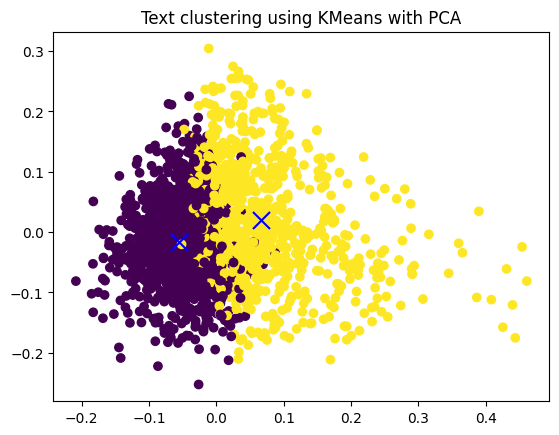

In [15]:
#Visualize Text clustering
# reduce the features to 2D
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2, random_state=0)
reduced_features = pca.fit_transform(X)
# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=kmeans.predict(X))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')
plt.title("Text clustering using KMeans with PCA")